Prerqisites

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

0: 640x512 1 bordered, 1 borderless, 1081.7ms
Speed: 0.0ms preprocess, 1081.7ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 512)
Boxes:  ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 1.])
conf: tensor([0.8025, 0.6064])
data: tensor([[115.9740, 177.3211, 437.3302, 439.8187,   0.8025,   0.0000],
        [ 28.5047, 446.2098, 436.1961, 562.1857,   0.6064,   1.0000]])
id: None
is_track: False
orig_shape: (600, 462)
shape: torch.Size([2, 6])
xywh: tensor([[276.6521, 308.5699, 321.3562, 262.4976],
        [232.3504, 504.1978, 407.6914, 115.9759]])
xywhn: tensor([[0.5988, 0.5143, 0.6956, 0.4375],
        [0.5029, 0.8403, 0.8824, 0.1933]])
xyxy: tensor([[115.9740, 177.3211, 437.3302, 439.8187],
        [ 28.5047, 446.2098, 436.1961, 562.1857]])
xyxyn: tensor([[0.2510, 0.2955, 0.9466, 0.7330],
        [0.0617, 0.7437, 0.

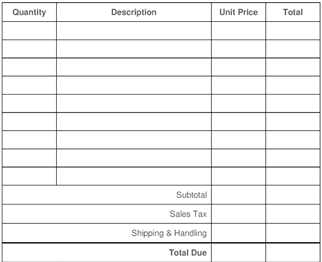

In [3]:
%pip install ultralyticsplus
%pip install pytesseract
import pytesseract
from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image
# load model
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image
image = r'C:\Users\User\Desktop\Data Analysis\Invoice 1.png'

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
img = Image.open(image)
img
# perform inference
results = model.predict(img)

# observe results
print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[0])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image